## Access Satellite Net Primary Productivity OC3 1Day Aqua data in Zarr
A jupyter notebook to show how to access and plot the AODN satellite_net_primary_productivity_oc3_1day_aqua dataset available as a [Zarr](https://zarr.dev/) dataset on S3.

More information about the dataset available [here](https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/b35b829c-9149-46c6-9e25-d0fd03463280).

In [1]:
dataset_name = "satellite_net_primary_productivity_oc3_1day_aqua"

In [2]:
import xarray as xr
import fsspec

## Install/Update packages and Load common functions

In [3]:
# only run once, then restart session if needed
!pip install uv

import os
import sys

def is_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False

# Get the current directory of the notebook
current_dir = os.getcwd()

# Check if requirements.txt exists in the current directory
local_requirements = os.path.join(current_dir, 'requirements.txt')
if os.path.exists(local_requirements):
    requirements_path = local_requirements
else:
    # Fall back to the online requirements.txt file
    requirements_path = 'https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/notebooks/requirements.txt'

# Install packages using uv and the determined requirements file
if is_colab():
    xr.set_options(display_style='text')
    os.system(f'uv pip install --system -r {requirements_path}')
else:
    os.system('uv venv')
    os.system(f'uv pip install -r {requirements_path}')

Using CPython 3.12.6 interpreter at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised/bin/python
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate
Audited 232 packages in 27ms


In [4]:
import requests
import os
if not os.path.exists('DataQuery.py'):
  print('Downloading DataQuery.py')
  url = 'https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/aodn_cloud_optimised/lib/DataQuery.py'
  response = requests.get(url)
  with open('DataQuery.py', 'w') as f:
      f.write(response.text)

In [5]:
from DataQuery import plot_gridded_variable, create_timeseries, plot_time_coverage

In [6]:
# remote zarr dataset
url = f's3://aodn-cloud-optimised/{dataset_name}.zarr/'
ds = xr.open_zarr(fsspec.get_mapper(url, anon=True), consolidated=True)
ds

<xarray.Dataset> Size: 5TB
Dimensions:              (latitude: 7001, longitude: 10001, time: 8041)
Coordinates:
  * latitude             (latitude) float64 56kB 10.0 9.99 9.98 ... -59.99 -60.0
  * longitude            (longitude) float64 80kB 80.0 80.01 ... 180.0 180.0
  * time                 (time) datetime64[ns] 64kB 2002-07-04T05:30:00 ... 2...
Data variables:
    npp_vgpm_eppley_oc3  (time, latitude, longitude) float64 5TB dask.array<chunksize=(5, 500, 500), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.6
    description_url:  http://www.science.oregonstate.edu/ocean.productivity/e...
    history:          File initialised at 2024-09-10T06:51:07.710308\nInitial...
    source_path:      imos-srs/archive/oc/aqua/v202302/1d/2024/09/A20240908.L...

## Plot time coverage

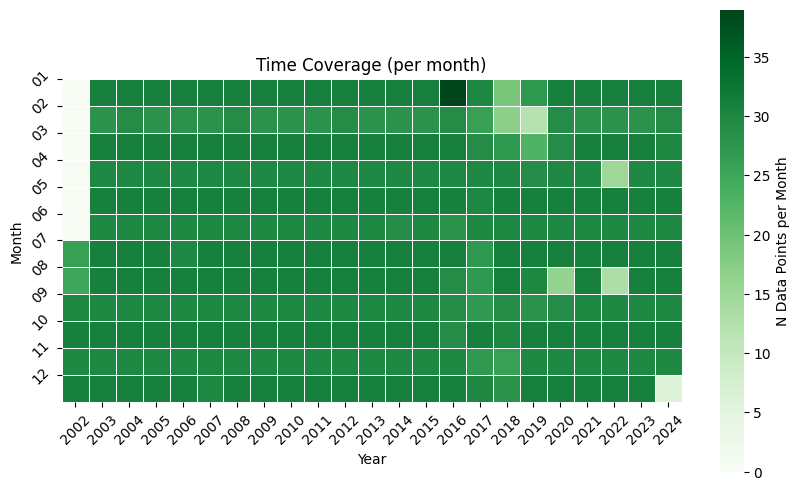

In [7]:
plot_time_coverage(ds)

## Timeseries at a point

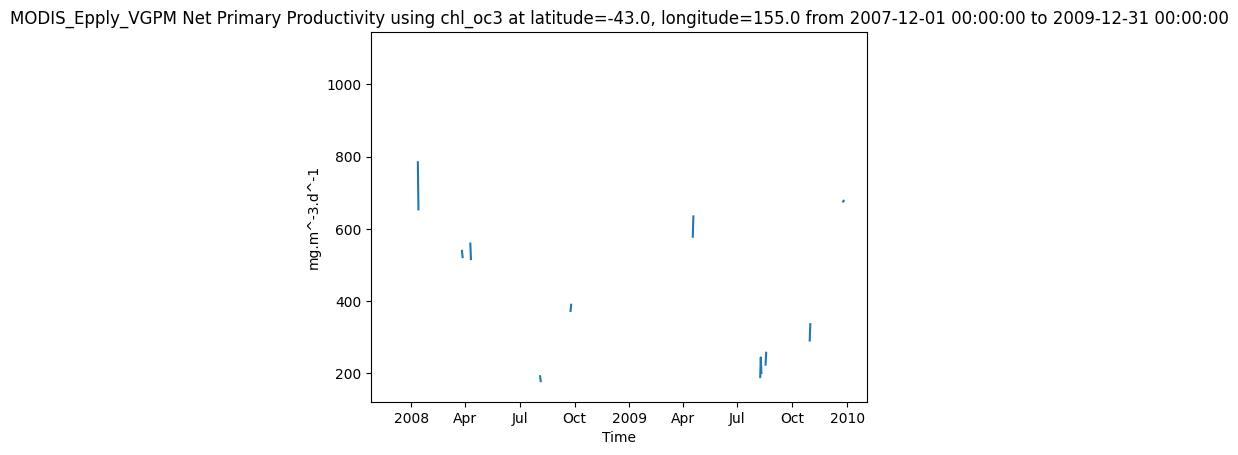

CPU times: user 6.92 s, sys: 829 ms, total: 7.75 s
Wall time: 12.4 s


In [8]:
%%time
time_series_df = create_timeseries(ds, 'npp_vgpm_eppley_oc3', lat=-43, lon=155, start_time='2007-12-01', end_time='2009-12-31', lon_name="longitude", lat_name="latitude")

## Plot a gridded variable

Nearest date in dataset: <xarray.DataArray 'time' ()> Size: 8B
array('2023-12-01T05:30:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 2023-12-01T05:30:00
Attributes:
    axis:           T
    long_name:      time
    standard_name:  time
Variable Long Name: MODIS_Epply_VGPM Net Primary Productivity using chl_oc3


/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:836: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


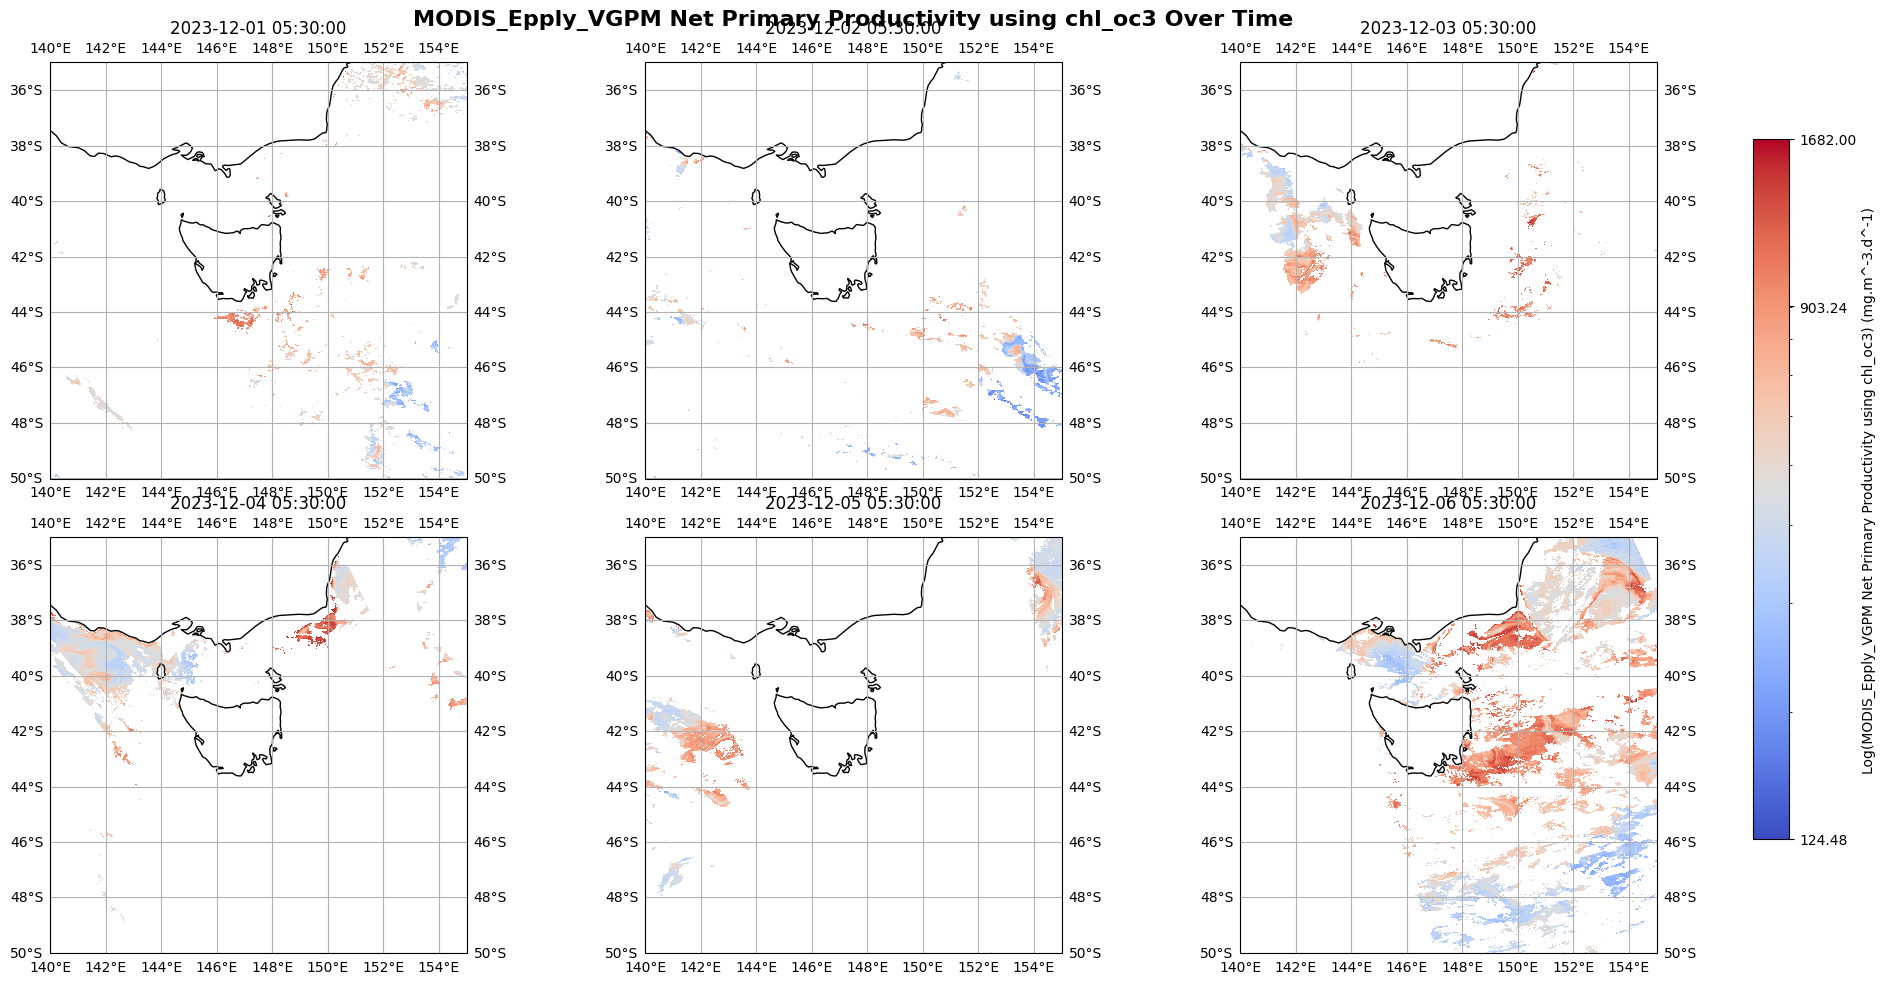

In [9]:
plot_gridded_variable(ds, start_date='2023-12-01', lon_slice=(140, 155), lat_slice=(-50, -35), var_name='npp_vgpm_eppley_oc3', n_days=6, coastline_resolution="50m", lon_name="longitude", lat_name="latitude", log_scale=True)